# Modelo de embeddings pré-treinado

 Vamos usar o gensim para carregar o modelo, que é baseado no word2vec, treinado na Wikipedia em vetores de 100 dimensões.




In [1]:
!pip install gensim


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 24.0/24.0 MB 4.5 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Using cached scipy-1.13.1-cp311-cp311-win_amd64.whl (46.2 MB)
     ---------------------------------------- 61.2/61.2 kB 1.6 MB/s eta 0:00:00
  Using cached wrapt-1.16.0-cp311-cp311-win_amd64.whl (37 kB)


In [ ]:
from gensim.models import KeyedVectors
from huggingface_hub import hf_hub_download
model = KeyedVectors.load_word2vec_format(hf_hub_download(repo_id="Word2vec/wikipedia2vec_ptwiki_20180420_100d", filename="ptwiki_20180420_100d.txt"))



Recuperando as palavras mais similares

In [ ]:
model.most_similar("café")

[('chá', 0.7796304821968079),
 ('arroz', 0.7319371104240417),
 ('açúcar', 0.7281299829483032),
 ('tortoni', 0.7269253134727478),
 ('cacau', 0.7245079278945923),
 ('torrefacção', 0.7227039933204651),
 ('ENTITY/Café', 0.7157695293426514),
 ('bananas', 0.7136856913566589),
 ('cana', 0.7131926417350769),
 ('abacaxi', 0.7131554484367371)]

In [ ]:
Álgebra com vetores

In [ ]:
result = model.most_similar(positive=['mulher', 'rei'], negative=['homem'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")


rainha: 0.8195


In [ ]:
result = model.most_similar(positive=['homem', 'pediatra'], negative=['mulher'])
print(result)
#most_similar_key, similarity = result  # look at the first match

#print(f"{most_similar_key}: {similarity:.4f}")

[('psiquiatra', 0.7475687861442566), ('psicólogo', 0.7366926670074463), ('médico', 0.7192966938018799), ('cardiologista', 0.7118995189666748), ('neurocirurgião', 0.7078838348388672), ('reumatologista', 0.7033130526542664), ('veterinário', 0.6969895958900452), ('parapsicólogo', 0.69378662109375), ('investigador', 0.6897295713424683), ('neuropatologista', 0.6863301396369934)]


In [ ]:
result = model.similar_by_word("gato")
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")


cachorro: 0.7855


Vetor da palavra

In [ ]:
vector = model['aula']  # numpy vector of a word
print(vector.shape)
vector

(100,)


array([-0.1271, -0.1697, -0.5071, -0.4313, -0.3738, -0.0837,  0.6614,
        0.3431,  0.2962,  0.699 ,  0.0392, -0.3132, -0.582 , -0.4596,
       -0.3384, -0.3654,  0.6042,  0.4202,  0.27  , -0.3159,  0.3319,
        0.0597,  0.2674, -0.2499, -0.1526,  0.4264, -0.29  , -0.0037,
       -0.4675,  0.1978,  0.7194, -0.151 ,  0.7087,  0.3857, -0.1122,
       -0.7684, -0.0725, -0.1645,  0.4749,  0.2201,  0.1802, -0.2608,
       -0.8657, -0.514 , -0.2627,  0.5888, -0.7328, -0.2701, -0.5254,
        0.2365,  0.3436,  0.1985, -0.4686, -0.1446, -0.0694,  0.1418,
        0.2805,  0.0946, -0.1606, -0.3089,  0.5267, -0.8918,  0.4148,
        0.5511,  0.0269,  0.1532, -0.5089,  0.1367,  0.316 , -0.3634,
       -0.4814, -0.3017, -0.4381, -0.4323,  0.5475,  0.0057, -0.8037,
        0.3937, -0.4486,  0.0653,  0.0842, -0.339 , -0.1368, -0.084 ,
       -0.0698,  0.2065, -0.0066, -0.1497, -0.0419,  0.6799,  0.2534,
       -0.3034,  0.0367, -0.1124,  0.1403, -0.0942, -0.0676,  0.1843,
       -0.1149, -0.4

Referências:

[Gensim](https://radimrehurek.com/gensim/models/keyedvectors.html)

[HuggingFace](https://huggingface.co/Word2vec/wikipedia2vec_ptwiki_20180420_100d)

# Agora vamos treinar nosso modelo com um texto específico: Dom Casmurro

Carregando arquivo do drive

In [2]:
#Acessando o googledrive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np

In [4]:
domcasmurro = list(open("/content/drive/MyDrive/LMs-gmail/domCasmurro.txt", encoding="utf-8"))
domcasmurro[0:10]

['Dom Casmurro\n',
 '\n',
 'CAPÍTULO PRIMEIRO\n',
 'DO TÍTULO\n',
 'Uma noite destas, vindo da cidade para o Engenho Novo, encontrei no trem da\n',
 'Central um rapaz aqui do bairro, que eu conheço de vista e de chapéu.\n',
 'Cumprimentou-me, sentou-se ao pé de mim, falou da Lua e dos ministros, e\n',
 'acabou recitando-me versos. A viagem era curta, e os versos pode ser que não\n',
 'fossem inteiramente maus. Sucedeu, porém, que, como eu estava cansado, fechei\n',
 'os olhos três ou quatro vezes; tanto bastou para que ele interrompesse a leitura e\n']

Tokenização: separar o texto em palavras (vamos ver mais sobre isso depois)

In [5]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(domcasmurro[9]))

['os', 'olhos', 'três', 'ou', 'quatro', 'vezes', ';', 'tanto', 'bastou', 'para', 'que', 'ele', 'interrompesse', 'a', 'leitura', 'e']


In [6]:
txt_tokenizado = [tokenizer.tokenize(linha.lower()) for linha in domcasmurro]
txt_tokenizado[0:10]

[['dom', 'casmurro'],
 [],
 ['capítulo', 'primeiro'],
 ['do', 'título'],
 ['uma',
  'noite',
  'destas',
  ',',
  'vindo',
  'da',
  'cidade',
  'para',
  'o',
  'engenho',
  'novo',
  ',',
  'encontrei',
  'no',
  'trem',
  'da'],
 ['central',
  'um',
  'rapaz',
  'aqui',
  'do',
  'bairro',
  ',',
  'que',
  'eu',
  'conheço',
  'de',
  'vista',
  'e',
  'de',
  'chapéu',
  '.'],
 ['cumprimentou',
  '-',
  'me',
  ',',
  'sentou',
  '-',
  'se',
  'ao',
  'pé',
  'de',
  'mim',
  ',',
  'falou',
  'da',
  'lua',
  'e',
  'dos',
  'ministros',
  ',',
  'e'],
 ['acabou',
  'recitando',
  '-',
  'me',
  'versos',
  '.',
  'a',
  'viagem',
  'era',
  'curta',
  ',',
  'e',
  'os',
  'versos',
  'pode',
  'ser',
  'que',
  'não'],
 ['fossem',
  'inteiramente',
  'maus',
  '.',
  'sucedeu',
  ',',
  'porém',
  ',',
  'que',
  ',',
  'como',
  'eu',
  'estava',
  'cansado',
  ',',
  'fechei'],
 ['os',
  'olhos',
  'três',
  'ou',
  'quatro',
  'vezes',
  ';',
  'tanto',
  'bastou',
  'para'

Treinando um modelo em vetores de 32 dimensões

In [7]:

from gensim.models import Word2Vec
our_model = Word2Vec(txt_tokenizado,
                 vector_size=32,      # tamanho do vetor de embeddings
                 min_count=2,         # palavras muito raras sendo desconsideradas (as que ocorrem menos que 2x)
                 window=5).wv         # janela de contexto de tamanho 5

In [8]:
our_model.get_vector('cansado')

array([-0.00633061, -0.10307603, -0.00481467,  0.02832669, -0.0011612 ,
        0.00977569,  0.11376311,  0.01371221, -0.06093551,  0.0002489 ,
        0.07820471, -0.08769166,  0.04016896, -0.02831046,  0.03277228,
        0.02388293,  0.020813  ,  0.03332421, -0.01924576,  0.10071632,
        0.0680858 ,  0.0932124 ,  0.1437191 , -0.03212439,  0.00645722,
        0.01391825, -0.096202  ,  0.01639138,  0.00970879, -0.06165813,
       -0.01666433,  0.01602257], dtype=float32)

In [9]:
our_model.most_similar('cansado')

[('sejam', 0.9581130146980286),
 ('íamos', 0.9566459655761719),
 ('saída', 0.9559290409088135),
 ('bolso', 0.9557097554206848),
 ('cérebro', 0.955624520778656),
 ('quais', 0.9554177522659302),
 ('pedia', 0.954838752746582),
 ('essa', 0.954768180847168),
 ('justiça', 0.9545263051986694),
 ('bela', 0.9544557929039001)]

Vamos exibir graficamente as N palavras mais frequentes

In [10]:
palavras = sorted(our_model.index_to_key,
               key=lambda palavra: len(our_model.index_to_key),
               reverse=True)[:1000]

print(palavras[:10])

[',', '.', 'que', 'a', 'e', 'de', 'o', 'não', '-', ';']


In [ ]:
vetores_palavras = np.array([our_model.get_vector(palavra) for palavra in palavras])

In [ ]:
vetores_palavras.shape

(1000, 32)

Reduzindo para duas dimensões e plotando com [tSNE](https://www.datacamp.com/pt/tutorial/introduction-t-sne)

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def tsne_plot(palavras, vectors):

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    valores = tsne_model.fit_transform(vectors)
    print(valores.shape)

    x = []
    y = []
    for valor in valores:
        x.append(valor[0])
        y.append(valor[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(palavras[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

(1000, 2)


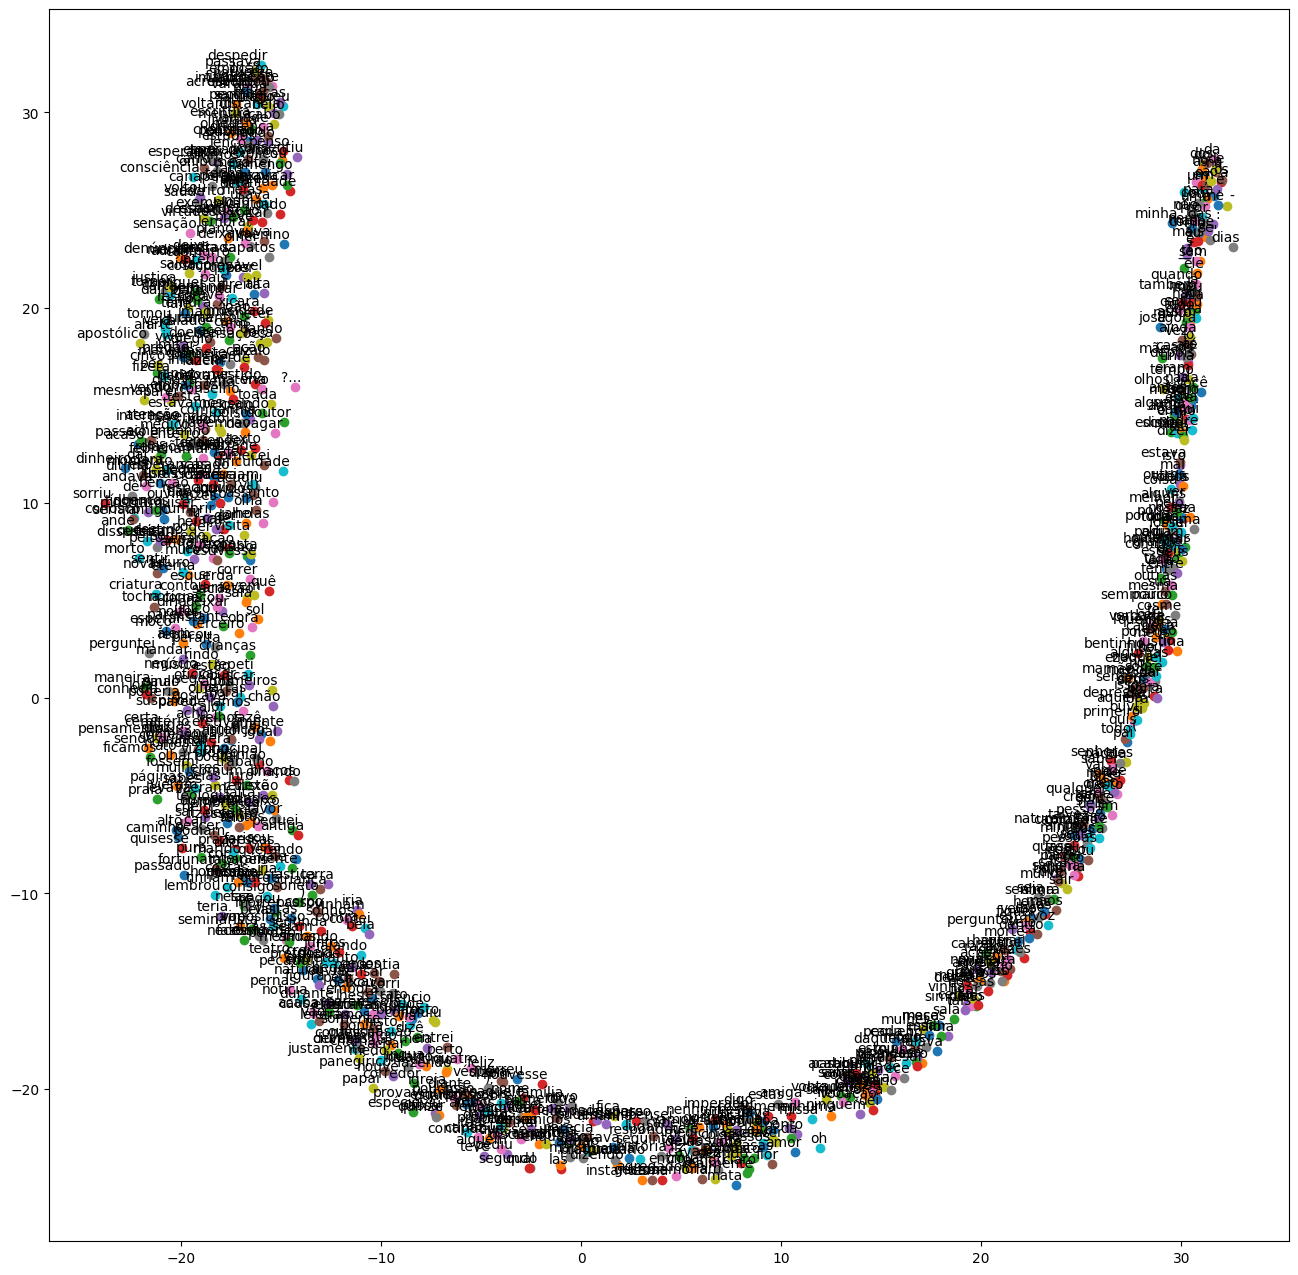

In [ ]:
tsne_plot(palavras, vetores_palavras)

(100, 2)


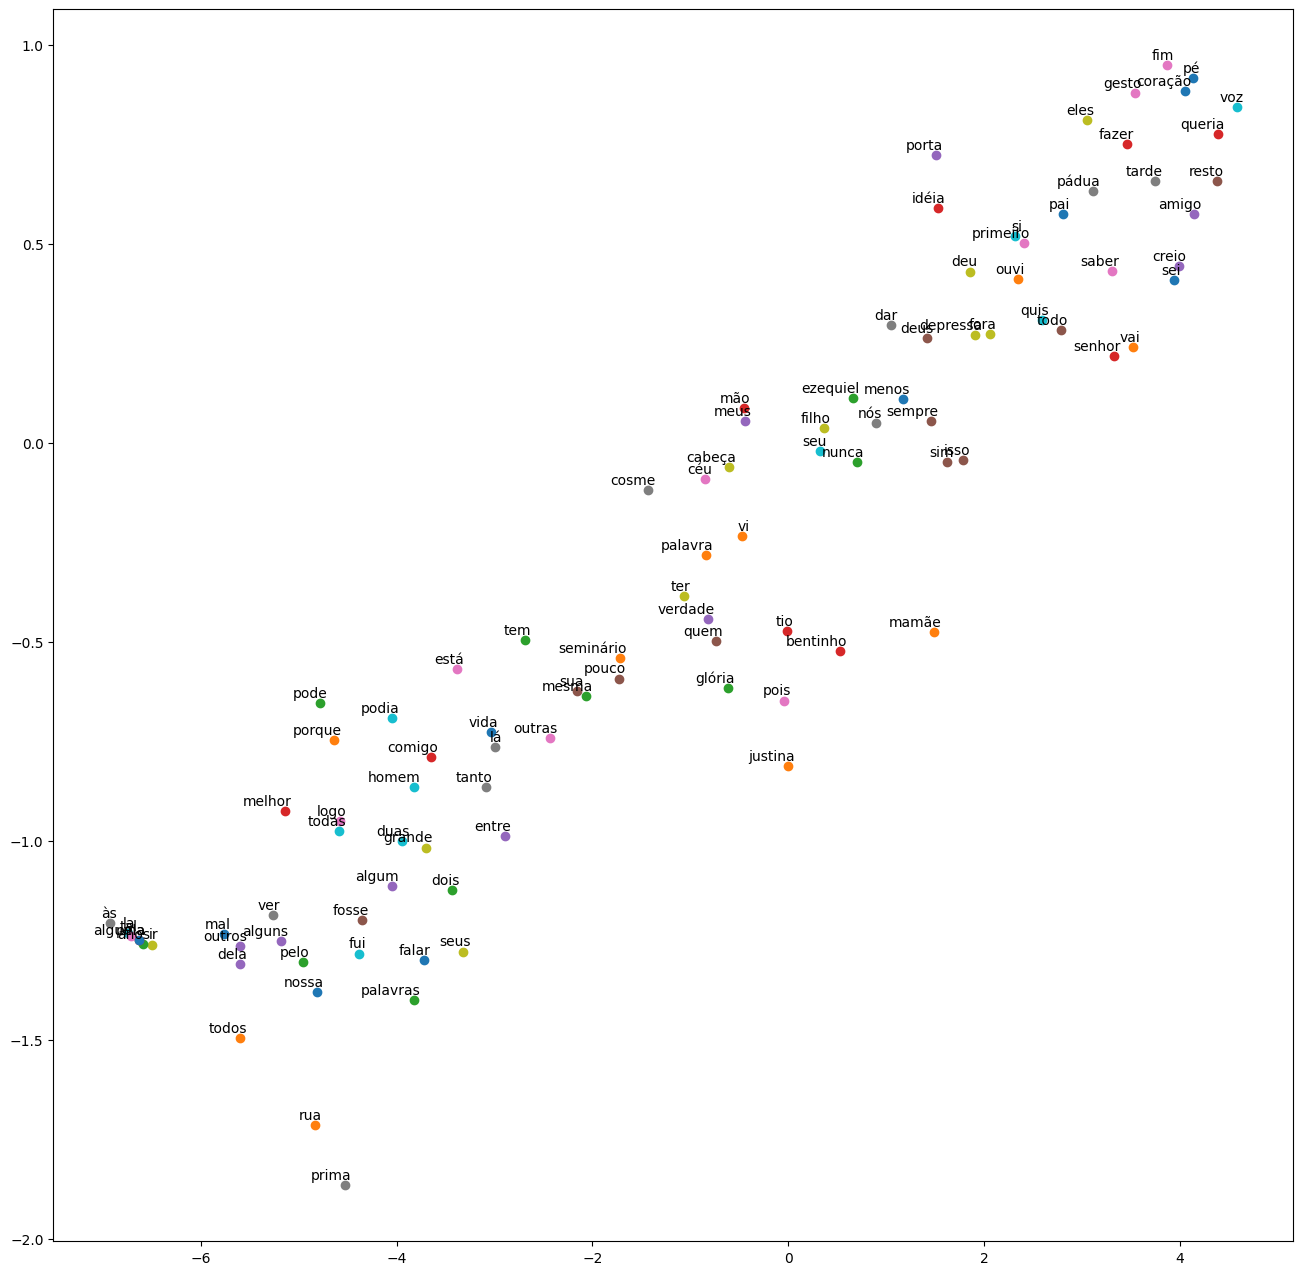

In [ ]:
tsne_plot(palavras[100:200], vetores_palavras[100:200])

Exercícios alternativos:


*   Plotar as palavras usando o modelo pre-treinado. Enviar o plot do gráfico com vetores em 2D
*   Repetir o treinamento do modelo com outro texto escolhido por você. Enviar o plot do gráfico com vetores em 2D
*    Gerar embeddings de frases. Escolher 10 frases do livro e fazer o plot das frases. Enviar o plot com os vetores em 2D.
